# Histogramas en Python

## Histogramas en Python puro

In [127]:
x = (0,1,1,1,2,2,3,7,7,7,25)

In [128]:
def count_elements(seq) -> dict:# crea un dicionario
    """
    Función que cuenta las frecuencias
    de aparición de cada elemento de la
    secuencia, creando un 'diccionario como
    si fuese una tabla de frecuencias'
    """
    hist = {}
    for i in seq:
        hist[i] = hist.get(i, 0) + 1
    return hist

In [129]:
fAbs = count_elements(x)

In [130]:
fAbs

{0: 1, 1: 3, 2: 2, 3: 1, 7: 3, 25: 1}

In [131]:
from collections import Counter # llamar libreria counter 

In [132]:
fAbs2 = Counter(x)

In [133]:
fAbs2

Counter({0: 1, 1: 3, 2: 2, 3: 1, 7: 3, 25: 1})

In [134]:
fAbs.items() == fAbs2.items()# son complentamente iguales con libreria y a manda con la funcion definida

True

In [135]:
def ascii_histogram(seq) -> None: # no devuelve nada
    """
    Un histograma de frecuencias absolutas
    colocado en horizontal y con caracteres ASCII
    """
    fAbs = count_elements(seq)
    for k in sorted(fAbs):# funcion sorted (ordena el vector)
        print('{0:5d} {1}'.format(k, '+'*fAbs[k])) # '{0:5d} {1}' {5 digitos}{1 digito}

In [136]:
ascii_histogram(x)

    0 +
    1 +++
    2 ++
    3 +
    7 +++
   25 +


In [137]:
import random
random.seed(2019) # semilla

In [138]:
vals = [1,2,3,5,7,8,9,10]
freqs = (random.randint(5,20) for _ in vals)# para cada elemento de VAls generara un aleatorior entero entre 5 - 20


In [139]:
data = []
for k, v in zip(vals, freqs): # Funcion zip Junta a la PAR dos vectores  y con FOR recorre a la PAR
    data.extend([k]*v) # Funcio Extend añade el propio valor de los arreglos y multiplica por los valores del randon

In [140]:
#data

In [141]:
ascii_histogram(data) 

    1 +++++++++
    2 ++++++++++++
    3 ++++++++++++++++++++
    5 ++++++++++
    7 ++++++++++++
    8 ++++++++++++
    9 +++++++++++++++
   10 ++++++++++++++


## Histograma con NumPy

In [142]:
import numpy as np
np.random.seed(2019) # semilla

In [143]:
np.set_printoptions(precision=3)# configurar parametros del funcionamiento de NumPy (3 desimales)

In [144]:
x = np.random.laplace(loc=10, scale=3 , size=1000)

In [145]:
x[:10]

array([14.935,  9.278, 10.855, 10.968, 14.294,  8.459, 11.555, 14.926,
       14.316,  9.373])

## Fabricar el Objecto histograma y las divisiones

In [146]:
# fabricar el Objecto histograma y los  extremos de las divisiones
hist, bin_edges = np.histogram(x) # hace 10 divisiones con la misma amplitud


In [147]:
hist

array([  1,   0,   0,   8,  48, 194, 542, 167,  31,   9])

In [148]:
bin_edges

array([-19.167, -14.642, -10.118,  -5.593,  -1.069,   3.455,   7.98 ,
        12.504,  17.029,  21.553,  26.077])

#### se lee asi:
    -19.167, -14.642 hay 1 observacion 
    -14.642, -10.118 hay 0 observacion 
    -10.118,  -5.593 hay 0 observacion
    -5.593,  -1.069  hay 8 observacion
    

In [149]:
hist.size, bin_edges.size # ver las divisione y los extremos

(10, 11)

In [150]:
min_edge = x.min()
print("min_edge:",min_edge)
max_edge = x.max()
print("max_edge:",max_edge)

min_edge: -19.166598935481197
max_edge: 26.077489713765466


In [151]:
n_bins = 10
bin_edges = np.linspace(start=min_edge, stop=max_edge, num=n_bins, endpoint=True)  
# distribucion de numeros a la misma distancia

In [152]:
bin_edges

array([-19.167, -14.139,  -9.112,  -4.085,   0.942,   5.969,  10.996,
        16.023,  21.05 ,  26.077])

In [153]:
x = (0,1,1,1,2,2,3,7,7,7,25)

In [154]:
bcount = np.bincount(x) # hace el conteio de datos
bcount

array([1, 3, 2, 1, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1])

In [155]:
# histograma _ omite los extremos con numpy
hist, _ = np.histogram(x, range=(0, max(x)), bins= max(x)+1)

In [156]:
hist

array([1, 3, 2, 1, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1])

In [157]:
# comprobamos que son inguales
np.array_equal(bcount, hist)

True

In [158]:
dict(zip(np.unique(x),bcount[bcount.nonzero()]))  # sin ceros 
#np.unique(x) = Devuelve valores únicos del objeto Serie.

{0: 1, 1: 3, 2: 2, 3: 1, 7: 3, 25: 1}

In [159]:
ascii_histogram(hist) 

    0 ++++++++++++++++++++
    1 +++
    2 +
    3 ++


In [160]:
ascii_histogram(bcount) 

    0 ++++++++++++++++++++
    1 +++
    2 +
    3 ++


## Visualizacion de histogramas con Matplotlib

In [161]:
import matplotlib.pyplot as plt

In [162]:
np.random.seed(2019) # semilla
x = np.random.laplace(loc=10, scale=3 , size=1000) # distribucion de Laplace

(0.0, 140.0)

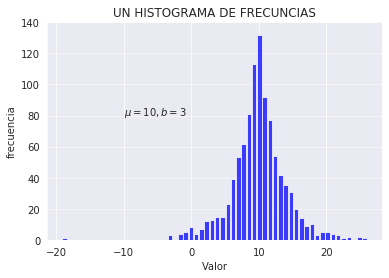

In [163]:
# la funcion hist no dara el numero 'n', de elementos. las divisiones 'bitns' y los patches
n, bins, patche = plt.hist(x = x, bins="auto", color="blue", alpha=0.75, rwidth=0.85)
plt.grid(axis='y', alpha=0.7)
plt.xlabel('Valor')
plt.ylabel('frecuencia')
plt.title('UN HISTOGRAMA DE FRECUNCIAS')
plt.text(-10, 80, r'$\mu = 10, b = 3$')
maxfreg = n.max()
plt.ylim(ymax = np.ceil(maxfreg/10)*10 if maxfreg %10 else maxfreg + 10 )

In [164]:
n

array([  1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   3.,   0.,
         4.,   5.,   8.,   4.,   7.,  12.,  13.,  15.,  15.,  23.,  39.,
        53.,  62.,  81., 113., 132.,  92.,  77.,  54.,  42.,  35.,  31.,
        20.,  14.,   9.,  10.,   3.,   5.,   5.,   4.,   3.,   1.,   2.,
         0.,   2.,   1.])

In [165]:
bins

array([-19.167, -18.387, -17.606, -16.826, -16.046, -15.266, -14.486,
       -13.706, -12.926, -12.146, -11.366, -10.586,  -9.806,  -9.026,
        -8.246,  -7.466,  -6.685,  -5.905,  -5.125,  -4.345,  -3.565,
        -2.785,  -2.005,  -1.225,  -0.445,   0.335,   1.115,   1.895,
         2.675,   3.455,   4.236,   5.016,   5.796,   6.576,   7.356,
         8.136,   8.916,   9.696,  10.476,  11.256,  12.036,  12.816,
        13.596,  14.376,  15.157,  15.937,  16.717,  17.497,  18.277,
        19.057,  19.837,  20.617,  21.397,  22.177,  22.957,  23.737,
        24.517,  25.297,  26.077])

In [166]:
patche

<a list of 58 Patch objects>

In [167]:
import pandas as pd

In [168]:
size , scala = 1000, 10
data = pd.Series(np.random.gamma(scala, size = size))

Text(0, 0.5, 'Frecuencia')

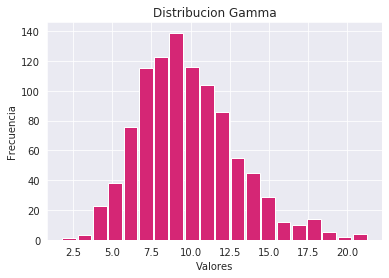

In [169]:
data.plot.hist(grid = True, bins= 20, rwidth = 0.9, color ='#d52675')
plt.title('Distribucion Gamma')
plt.xlabel('Valores')
plt.ylabel('Frecuencia')
#plt.grid(axis = "y", alpa = 0.75)

## Funciones de densidad y de probabilidad

In [170]:
mu = 10, 20
sigma = 5, 2
dist = pd.DataFrame(np.random.normal(loc=mu, scale = sigma, size = (1000, 2)), columns=['x1','x2'])
dist.head(5)

,x1,x2
0,11.281786,20.053328
1,8.185923,19.833196
2,7.618714,18.891356
3,9.527052,20.381828
4,5.929403,22.954476


In [171]:
dist.agg(['min', 'max', 'mean','std']).round(decimals = 2)

,x1,x2
min,-5.83,13.84
max,26.05,27.17
mean,9.96,19.89
std,4.97,1.96


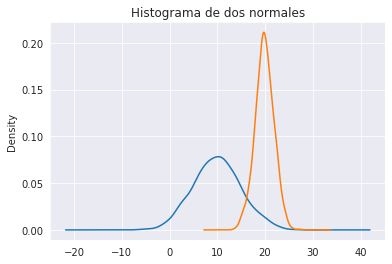

In [172]:
## funcios desidad estimada
fig, ax = plt.subplots()
dist.plot.kde(ax = ax, legend = False, title = 'Histograma de dos normales')

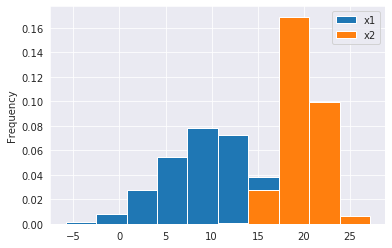

In [173]:
## funcion de las frecuencias
fig, ax = plt.subplots()
dist.plot.hist(density=True, ax=ax)

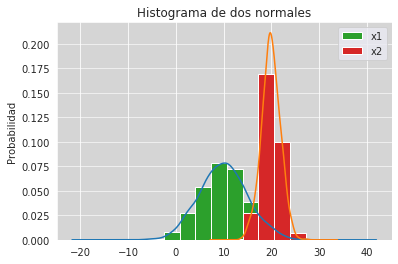

In [174]:
## funcios desidad estimada
fig, ax = plt.subplots()
dist.plot.kde(ax = ax, legend = False, title = 'Histograma de dos normales')
dist.plot.hist(density=True, ax=ax)
ax.set_ylabel("Probabilidad")
ax.grid(axis="y", alpha= 0.75)
ax.set_facecolor("#d5d5d5") # colosr de fondo

## Distribucion  Normal Teorica

In [175]:
from  scipy import stats 

In [176]:
dist = stats.norm()# Distribucion normal teorica Normal(0,1) = exp(-x**/2)/sqrt(2*pi)

In [177]:
sample = dist.rvs(size = 1000) # muestreo

In [178]:
stats.norm.ppf(0.01)

-2.3263478740408408

In [179]:
stats.norm.ppf(0.99)

2.3263478740408408

In [180]:
x = np.linspace(start= stats.norm.ppf(0.01), stop= stats.norm.ppf(0.99), num = 250)

In [181]:
gkde = stats.gaussian_kde(dataset= sample)

Text(-2.0, 0.34, '$f(x)= \\frac{e^{-x^2/2}}{\\sqrt{2/pi}} $')

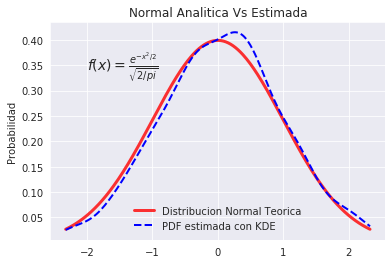

In [182]:
fig, ax = plt.subplots()
ax.plot(x, dist.pdf(x), linestyle = "solid", c="red", lw=3, alpha=0.8, label = "Distribucion Normal Teorica")
ax.plot(x, gkde.evaluate(x), linestyle = "dashed", c="Blue", lw = 2, label = "PDF estimada con KDE")
ax.legend(loc="best", frameon=False)
ax.set_title("Normal Analitica Vs Estimada")
ax.set_ylabel("Probabilidad")
ax.text(-2., 0.34, r'$f(x)= \frac{e^{-x^2/2}}{\sqrt{2/pi}} $' ,fontsize=14)

## Histogramas con Seaborn

In [183]:
import seaborn as sb

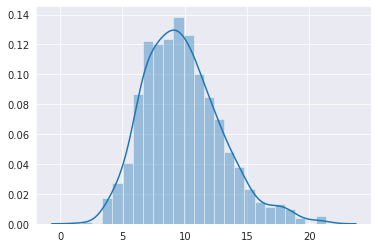

In [184]:
sb.distplot(data)

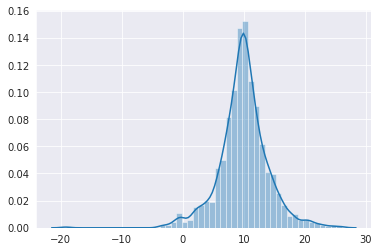

In [187]:
np.random.seed(2019) # semilla
x = np.random.laplace(loc=10, scale=3 , size=1000) # distribucion de Laplace
sb.set_style("darkgrid")
sb.distplot(x)

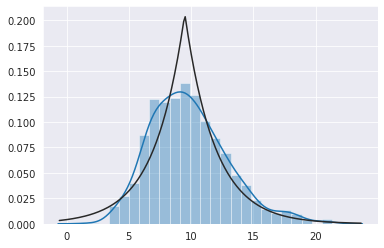

In [188]:
sb.distplot(data, fit=stats.laplace)

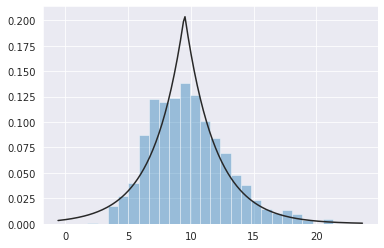

In [189]:
sb.distplot(data, fit=stats.laplace, kde=False)

## Otras formas

In [190]:
data2 = np.random.choice(np.arange(10), size=10000, p= np.linspace(1,11,10)/60)
data2

array([3, 6, 6, ..., 9, 9, 9])

In [192]:
s = pd.Series(data2)
s.value_counts() # frecuencias absolutas

9    1840
8    1622
7    1478
6    1276
5    1050
4     909
3     781
2     537
1     361
0     146
dtype: int64

In [193]:
s.value_counts(normalize=True) # frecuencias relativas

9    0.1840
8    0.1622
7    0.1478
6    0.1276
5    0.1050
4    0.0909
3    0.0781
2    0.0537
1    0.0361
0    0.0146
dtype: float64

In [196]:
ages = pd.Series([1,1,3,5,6,8,9,10,12,15,18,18,20,25,30,40,51,52])
bins = (0,10,15,18,21,np.inf)
labels = ('infancia','preadolecencia','adolescencia','universitaria','adulto')
gruops = pd.cut(ages,bins=bins,labels=labels)

In [197]:
gruops

0           infancia
1           infancia
2           infancia
3           infancia
4           infancia
5           infancia
6           infancia
7           infancia
8     preadolecencia
9     preadolecencia
10      adolescencia
11      adolescencia
12     universitaria
13            adulto
14            adulto
15            adulto
16            adulto
17            adulto
dtype: category
Categories (5, object): [infancia < preadolecencia < adolescencia < universitaria < adulto]

In [198]:
gruops.value_counts()

infancia          8
adulto            5
adolescencia      2
preadolecencia    2
universitaria     1
dtype: int64

In [199]:
# contatenar por edad y grupo
pd.concat((ages, gruops),axis=1)

,0,1
0,1,infancia
1,1,infancia
2,3,infancia
3,5,infancia
4,6,infancia
5,8,infancia
6,9,infancia
7,10,infancia
8,12,preadolecencia
9,15,preadolecencia


In [200]:
pd.concat((ages, gruops),axis=1).rename(columns={0:'años', 1:'grupo'})

,años,grupo
0,1,infancia
1,1,infancia
2,3,infancia
3,5,infancia
4,6,infancia
5,8,infancia
6,9,infancia
7,10,infancia
8,12,preadolecencia
9,15,preadolecencia


# EVALUCION 

Pregunta 1:
La diferencia entre un barplot y un histograma es:
- Todas las respuestas son correctas

Pregunta 2:
El histograma se utiliza para representar:
- todas los graficos

**Pregunta 3:
El área bajo una densidad:**
- es igual a uno
(clase 138)

**Pregunta 4:
La función de distribución de los datos**
- es la suma acumulada de la densidad de la distribucion de los datos.
(clase 138)